In [1]:
#! pip install multiprocess --user

In [2]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.decomposition import PCA

import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import figure
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
matplotlib.rcParams.update({'font.size': 22})
import seaborn as sns

print(__doc__)

from time import time

from multiprocess import Pool
import pdb
import pickle

Automatically created module for IPython interactive environment


## Read in data as csv 

In [3]:
data=pd.read_table('/Users/gracer/Google Drive/ABCD/important_txt/4Kmeans.csv', sep=',')

## Seperate by sex

In [4]:
dudes = data[data['sex'] == 0]
lady_dudes = data[data['sex'] == 1]

## Get a List of variable names

In [5]:
var_names=list(lady_dudes.columns.values)
cols = lady_dudes.columns
lady_dudes.columns = ['sub','pds_ht2_y',  'pds_skin2_y',  'pds_bdyhair_y','labels_true',
            'pds_f4_2_y',  'pds_f5_y',  'pds_m4_y', 'pds_m5_y', 'interview_age', 'gender',
             'anthroheightcalc',  'anthroweightcalc',  'anthro_waist_cm',
             'hormone_scr_dhea_mean',  'hormone_scr_hse_mean',  'hormone_scr_ert_mean',  'sex']
# print(dudes)
# cols[1]

## Combine variables of interest into a single matrix

In [6]:
labels_true=lady_dudes['labels_true'].values
subs=lady_dudes['sub'].values
f2=lady_dudes['pds_ht2_y'].values
f3=lady_dudes['pds_skin2_y'].values
f4=lady_dudes['pds_bdyhair_y'].values
f5=lady_dudes['pds_f4_2_y'].values
f6=lady_dudes['pds_f5_y'].values
f7=lady_dudes['interview_age'].values
f8=lady_dudes['anthroheightcalc'].values 
f9=lady_dudes['anthroweightcalc'].values
f10=lady_dudes['anthro_waist_cm'].values
f11=lady_dudes['hormone_scr_dhea_mean'].values
f12=lady_dudes['hormone_scr_hse_mean'].values
f13=lady_dudes['hormone_scr_ert_mean'].values
X=np.matrix(zip(f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13))

## Create a list of the variable names included in this analyses

In [7]:
names=['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_m4_y',
'pds_m5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']

## Check the data 

[(1, 610), (2, 271), (3, 20), (4, 2)]

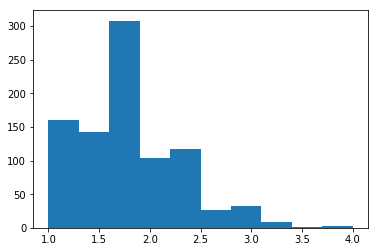

In [8]:
%matplotlib inline
plt.hist(labels_true)
y = np.bincount(labels_true.astype(int))
ii = np.nonzero(y)[0]
zip(ii,y[ii])

An issue is a low number of people in groups 3 and 4

## Possible solution, randomly sample equal numbers
Using the rule of thumb 2^m I need 8 people per cluster 
Possible combinations below

In [9]:
import math
x=math.factorial(70)
y=math.factorial(70-20)
fact=x/y
print(fact)

393849377343759797528386895216640000


## Create target variable (or the one you are comparing)

In [10]:
target_var=pd.DataFrame(lady_dudes['labels_true'].values)
subs_var=pd.DataFrame(subs)
target_var.shape

(903, 1)

## Impute missing values
This will not allow missing data, so have to impute nans

In [11]:
imputer = Imputer()
transformed_values = imputer.fit_transform(X)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum()) 
transformed_values_scale = scale(transformed_values)
transformed_values_scale.shape
#the target variable is the last variable
trans = np.column_stack((transformed_values_scale,subs,target_var.round(decimals=0)))

0


In [12]:
print(trans.shape)
trans[10,:]

(903, 14)


array([1.794456303524673, -0.9160012976566702, -0.8450545827601281,
       0.24962498873615438, -0.19189160229840163, 0.6021071251259197,
       1.9996576547510394, 4.417977219002053, 3.245935807081636,
       -0.8820291919726035, 1.8356440165628365e-15, -9.680805970204422e-15,
       'NDAR_INV0C1ED337', 2.0], dtype=object)

## Function to randomly sample the data and perform the kmeans

In [13]:
def bench_k_means(estimator, name, data):
        t0 = time() #time
        estimator.fit(data) #estimating the fit 
        print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
              % (name, (time() - t0), estimator.inertia_,
                 metrics.homogeneity_score(labels, estimator.labels_),
                 metrics.completeness_score(labels, estimator.labels_),
                 metrics.v_measure_score(labels, estimator.labels_),
                 metrics.adjusted_rand_score(labels, estimator.labels_),
                 metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
                 metrics.silhouette_score(data, estimator.labels_,
                                          metric='euclidean',
                                          sample_size=sample_size)))


In [14]:
def meaner(**kwargs):
    for x in kwargs.items():
        print(x)
#     z=sum(*arg)/len(*arg)
#     return z

In [15]:
def PCA_reducer(DATA):
    n_samples, n_features = DATA.shape
    labels = np.round(targets)
    n_digits = len(np.unique(targets))
    sample_size=n_samples
    
    PCA_results = PCA(n_components=2)
    reduced_data = PCA_results.fit_transform(DATA)
    
    # Dump components relations with features:
    print pd.DataFrame(PCA_results.components_,index = ['PC-1','PC-2'])
    plt.semilogy(PCA_results.explained_variance_ratio_, '--o')
    return (PCA_results.components_, PCA_results.explained_variance_ratio_, 
            PCA_results.explained_variance_, PCA_results.mean_) 
    


In [16]:
def split_list(a_list):
        half = len(a_list)/2
        return a_list[:half], a_list[half:]

In [17]:
def random_selct(DATA):
    dictr = {}
    #defining the levels, based on the final column add the values to the dictionary
    levels = ['lev1','lev2','lev3']
    i=1
    for lev in levels:
        if i < len(levels)+1:
            dictr[lev] = DATA[np.where(DATA[:,-1] == i)]
            i=i+1
    '''
    make dictionaries to populate each run per parallel run
    '''
    rand_dict={}
    target_dict={}
    ind_dict={}
    sub_dict = {}
    '''
    subsetting the data and putting it into a dictionary
    '''
    for key, value in dictr.iteritems():
        #shuffle the data's index
        ind = np.random.permutation(value.shape[0])#random index
        #get the first 20 subjects indexes
        training_idx = ind[:50]#get 20 subjects indexes
        #get the first 20 subjects
        '''
        this needs to be the number of variables/factors you are expecting
        for females this is 12!!!!
        '''
        value_data = value[:,0:12]
#         print(value_data.shape)
        '''
        for females this is 13!!!!
        '''
        sub_data = value[:,12]
#         print(sub_data)
        label_data = value[:,-1]
        training = value_data[training_idx,:]#select 20 subjects from the value in the dictionary
        subs = sub_data[training_idx]
        labels_true = label_data[training_idx]
        #saving the true labels
        target_dict[key] = labels_true #add targets to dictionary
        rand_dict[key] = training #match the randomized data to the ind_dict by key 
        ind_dict[key] = training_idx #add the indexes to the dictionary
        sub_dict[key] = subs
    '''
    combine all the dictionaries we have created thus far. 
    data, index, and targets
    '''    
    list_dicts = [rand_dict, target_dict, ind_dict, sub_dict]
    list_names  = ['rand_dict', 'target_dict', 'ind_dict', 'sub_dict']
    all_dicts = {}
    i = 0
    for d in list_dicts:
        all_dicts[list_names[i]] = list_dicts[i]
        i = i +1
#         print(all_dicts['rand_dict'])
   
    '''
    combine the randomized data by the actual level
    '''
    data=np.vstack((rand_dict['lev1'],rand_dict['lev2'],rand_dict['lev3']))
    print(data.shape)
    '''
    defining the parameters for the k means and the PCA
    '''
    targets=np.hstack((target_dict['lev1'],target_dict['lev2'],target_dict['lev3']))
    targets = targets.astype('int')
    n_samples, n_features = data.shape
    n_digits = len(np.unique(targets))
    sample_size=n_samples
    '''
    defining the parameters for the k means
    '''    
    kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=300)
    ks=kmeans.fit_predict(data)
    indexes=np.hstack((ind_dict['lev1'],ind_dict['lev2'],ind_dict['lev3']))
    subses=np.hstack((sub_dict['lev1'],sub_dict['lev2'],sub_dict['lev3']))
    list_together = [indexes, subses, ks, targets,data]
    '''
    IMPORTANT ALL THE DATA INDEXED WITH SUBJECTS
    '''
    all_together = np.column_stack(list_together)
#     print(all_together.shape)
    ###################################################
    
    
    ###########################################
    #            rebuild to combine data      #
    ###########################################
    comb_data = np.column_stack((data, kmeans.fit_predict(data)))
#     print(comb_data.shape)
    comb_dictr = {}
    '''
    seperating the data based on the fit predict value (found right above)
    '''
    i=0
    for lev in levels:
        if i < len(levels)+1:
            comb_dictr[lev] = comb_data[np.where(comb_data[:,-1] == i)]
            i=i+1
    '''
    defining the parameters for the PCA and running the PCA 
    '''
    ###########################################
    #            PCA                          #
    ###########################################
    PCA_dict={}
    PCA_data={}
    PCA_final = {}

    for key, value in comb_dictr.iteritems():
        PCA_dict[key] = PCA(n_components=2)
        #make sure the last column which is the predicted label isn't included
        PCA_data[key] = PCA_dict[key].fit_transform(value[:,0:12])
        #make sure the last column which is the predicted label isn't included
        ID = np.identity(value[:,0:12].shape[1])  # identity matrix
        coef = PCA_dict[key].transform(ID)
        PCA_final[key] = coef
        
        
        plt.semilogy(PCA_dict[key].explained_variance_ratio_, '--o', label = '%s'%key)
        plt.legend()
        plt.subplot(1, 2, 2)

    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.subplot(1, 2, 1)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
#     plt.show()
    
    ####THINGS TO SAVE#############################################################################        
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    clusters = kmeans.fit_predict(data)
    cluster_space = kmeans.fit_transform(data)
    
    
    
    centroids = kmeans.cluster_centers_   
    
    Components = np.vstack((PCA_dict['lev1'].components_,
                            PCA_dict['lev2'].components_,PCA_dict['lev3'].components_))
    
    Var_ratio = PCA_final
    
    lev1_VarRatio = np.vstack((PCA_final['lev1']))
    print(lev1_VarRatio.shape)
    lev2_VarRatio = np.vstack((PCA_final['lev2']))
    lev3_VarRatio = np.vstack((PCA_final['lev3']))
    
    ind_dict = np.hstack((ind_dict['lev1'],
                            ind_dict['lev2'],ind_dict['lev3']))
    
    ########################################################################################################
    return (clusters, cluster_space,
            centroids,targets,
            all_together ,Components,
            Var_ratio, comb_data,
            lev1_VarRatio,lev2_VarRatio,lev3_VarRatio,
            kmeans,DATA)

# 0clusters
# 1cluster_space, 
# 2centroids, 
# 3targets, 
# 4all_dict,
# 5Components,
# 6Var_ratio, 
# 7full_data,
# 8lev1_VarRatio,
# 9lev2_VarRatio,
# 10lev3_VarRatio
# 11kmeans
# 12DATA

In [18]:
def main(i):
    names = ['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_f4_2_y',
'pds_f5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean',
'labels_pred',
'labels_true']
    
    Clusters = []
    Cluster_space = []
    Centroids = []
    
    Comp = []
    Var_ratio = []
    
    Targets = []
    all_dicts = []
    
    Comb_data = []
    
    Lev1_VarRatio = []
    Lev2_VarRatio = []
    Lev3_VarRatio = []
    
    kmeans = []
    filename = '/Users/gracer/Google Drive/ABCD/important_txt/female_data.pickle'
    handle = open(filename, 'wb')
    for x in range(0,i):
        print(x)
        Q = random_selct(trans)
        Clusters.append(Q[0])
        Cluster_space.append(Q[1])
        Centroids.append(Q[2])
        
        Targets.append(Q[3])
        all_dicts.append(Q[4])
        
        Comp.append(Q[5])
        Var_ratio.append(Q[6])
        
        Comb_data.append(Q[7])
        
        Lev1_VarRatio.append(Q[8].transpose())
        Lev2_VarRatio.append(Q[9].transpose())
        Lev3_VarRatio.append(Q[10].transpose())
        
        kmeans.append(Q[11])
        
        
    All_lev1Ratio = np.vstack(Lev1_VarRatio)
    All_lev2Ratio = np.vstack(Lev2_VarRatio)
    All_lev3Ratio = np.vstack(Lev3_VarRatio)
    
    All_clust = np.hstack(Clusters)
    All_clust_space = np.vstack(Cluster_space)
    
    All_labels = np.hstack(Targets)
    All_dicts = np.vstack(all_dicts)
    All_comp = np.vstack(Comp)
    All_var_ratio = Var_ratio
    All_data = np.vstack(Comb_data)
    All_data=pd.DataFrame(data=All_data[1:,1:],index=All_data[1:,0])
    
    
    return (All_clust ,All_clust_space,
            All_labels , All_dicts,
            All_comp, All_var_ratio,
            All_data, names,
            All_lev1Ratio, All_lev2Ratio, All_lev3Ratio,
            kmeans, trans, All_dicts)
i = 1000
FINAL = []


# FINAL = main(i)
if __name__ == "__main__": 
    pool = Pool(processes=2)
    FINAL = pool.map(main, (i,i)) 

0
0
(150, 12)
(150, 12)


/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(12, 2)
1
(12, 2)
(150, 12)
1
(150, 12)
(12, 2)
(12, 2)
2
2
(150, 12)
(150, 12)
(12, 2)
3
(150, 12)
(12, 2)
3
(150, 12)
(12, 2)
4
(150, 12)
(12, 2)
4
(150, 12)
(12, 2)
5
(150, 12)
(12, 2)
5
(150, 12)
(12, 2)
6
(150, 12)
(12, 2)
6
(150, 12)
(12, 2)
7
(150, 12)
(12, 2)
7
(150, 12)
(12, 2)
8
(150, 12)
(12, 2)
8
(150, 12)
(12, 2)
9
(150, 12)
(12, 2)
9
(150, 12)
(12, 2)
10
(150, 12)
(12, 2)
10
(150, 12)
(12, 2)
11
(150, 12)
(12, 2)
11
(150, 12)
(12, 2)
12
(150, 12)
(12, 2)
12
(150, 12)
(12, 2)
13
(150, 12)
(12, 2)
13
(150, 12)
(12, 2)
14
(150, 12)
(12, 2)
14
(150, 12)
(12, 2)
(12, 2)
15
(150, 12)
15
(150, 12)
(12, 2)
16
(12, 2)
(150, 12)
16
(150, 12)
(12, 2)
17
(150, 12)
(12, 2)
17
(150, 12)
(12, 2)
18
(150, 12)
(12, 2)
18
(150, 12)
(12, 2)
19
(150, 12)
(12, 2)
19
(150, 12)
(12, 2)
20
(150, 12)
(12, 2)
20
(150, 12)
(12, 2)
21
(150, 12)
(12, 2)
21
(150, 12)
(12, 2)
22
(150, 12)
(12, 2)
22
(150, 12)
(12, 2)
23
(150, 12)
(12, 2)
23
(150, 12)
(12, 2)
24
(150, 12)
(12, 2)
24
(150, 12)
(12, 2)
25

192
(150, 12)
(12, 2)
192
(150, 12)
(12, 2)
193
(150, 12)
(12, 2)
193
(150, 12)
(12, 2)
194
(150, 12)
(12, 2)
194
(150, 12)
(12, 2)
195
(150, 12)
(12, 2)
195
(150, 12)
(12, 2)
196
(150, 12)
(12, 2)
196
(150, 12)
(12, 2)
197
(150, 12)
(12, 2)
197
(150, 12)
(12, 2)
198
(150, 12)
(12, 2)
198
(150, 12)
(12, 2)
199
(150, 12)
(12, 2)
199
(150, 12)
(12, 2)
200
(150, 12)
(12, 2)
200
(150, 12)
(12, 2)
201
(150, 12)
(12, 2)
201
(150, 12)
(12, 2)
202
(150, 12)
(12, 2)
202
(150, 12)
(12, 2)
203
(150, 12)
(12, 2)
203
(150, 12)
(12, 2)
204
(150, 12)
(12, 2)
204
(150, 12)
(12, 2)
205
(150, 12)
(12, 2)
205
(150, 12)
(12, 2)
206
(150, 12)
(12, 2)
206
(150, 12)
(12, 2)
207
(150, 12)
(12, 2)
207
(150, 12)
(12, 2)
208
(150, 12)
(12, 2)
208
(150, 12)
(12, 2)
209
(150, 12)
(12, 2)
209
(150, 12)
(12, 2)
210
(150, 12)
(12, 2)
210
(150, 12)
(12, 2)
211
(150, 12)
(12, 2)
211
(150, 12)
(12, 2)
212
(150, 12)
(12, 2)
212
(150, 12)
(12, 2)
213
(150, 12)
(12, 2)
213
(150, 12)
(12, 2)
214
(150, 12)
(12, 2)
214
(150, 

(12, 2)
378
(150, 12)
(12, 2)
379
(150, 12)
(12, 2)
379
(150, 12)
(12, 2)
380
(150, 12)
(12, 2)
380
(150, 12)
(12, 2)
381
(150, 12)
(12, 2)
381
(150, 12)
(12, 2)
382
(150, 12)
(12, 2)
382
(150, 12)
(12, 2)
383
(150, 12)
(12, 2)
383
(150, 12)
(12, 2)
384
(150, 12)
(12, 2)
384
(150, 12)
(12, 2)
385
(150, 12)
(12, 2)
385
(150, 12)
(12, 2)
386
(150, 12)
(12, 2)
386
(150, 12)
(12, 2)
387
(150, 12)
(12, 2)
387
(150, 12)
(12, 2)
388
(150, 12)
(12, 2)
388
(150, 12)
(12, 2)
389
(150, 12)
(12, 2)
389
(150, 12)
(12, 2)
390
(150, 12)
(12, 2)
390
(150, 12)
(12, 2)
391
(150, 12)
(12, 2)
391
(150, 12)
(12, 2)
392
(150, 12)
(12, 2)
392
(150, 12)
(12, 2)
393
(150, 12)
(12, 2)
393
(150, 12)
(12, 2)
394
(150, 12)
(12, 2)
394
(150, 12)
(12, 2)
395
(150, 12)
(12, 2)
395
(150, 12)
(12, 2)
396
(150, 12)
(12, 2)
396
(150, 12)
(12, 2)
397
(150, 12)
(12, 2)
397
(150, 12)
(12, 2)
398
(150, 12)
(12, 2)
398
(150, 12)
(12, 2)
399
(150, 12)
(12, 2)
399
(150, 12)
(12, 2)
400
(150, 12)
(12, 2)
400
(150, 12)
(12, 2)
40

(150, 12)
(12, 2)
565
(150, 12)
(12, 2)
565
(150, 12)
(12, 2)
566
(150, 12)
(12, 2)
566
(150, 12)
(12, 2)
567
(150, 12)
(12, 2)
567
(150, 12)
(12, 2)
568
(150, 12)
(12, 2)
568
(150, 12)
(12, 2)
569
(150, 12)
(12, 2)
569
(150, 12)
(12, 2)
570
(150, 12)
(12, 2)
570
(150, 12)
(12, 2)
571
(150, 12)
(12, 2)
571
(150, 12)
(12, 2)
572
(150, 12)
(12, 2)
572
(150, 12)
(12, 2)
573
(150, 12)
(12, 2)
573
(150, 12)
(12, 2)
574
(150, 12)
(12, 2)
574
(150, 12)
(12, 2)
575
(150, 12)
(12, 2)
575
(150, 12)
(12, 2)
576
(150, 12)
(12, 2)
576
(150, 12)
(12, 2)
577
(150, 12)
(12, 2)
577
(150, 12)
(12, 2)
578
(150, 12)
(12, 2)
578
(150, 12)
(12, 2)
579
(150, 12)
(12, 2)
579
(150, 12)
(12, 2)
580
(150, 12)
(12, 2)
580
(150, 12)
(12, 2)
581
(150, 12)
(12, 2)
581
(150, 12)
(12, 2)
582
(150, 12)
(12, 2)
582
(150, 12)
(12, 2)
583
(150, 12)
(12, 2)
583
(150, 12)
(12, 2)
584
(150, 12)
(12, 2)
584
(150, 12)
(12, 2)
585
(150, 12)
(12, 2)
585
(150, 12)
(12, 2)
586
(150, 12)
(12, 2)
586
(150, 12)
(12, 2)
587
(150, 12)


(12, 2)
751
(150, 12)
(12, 2)
751
(150, 12)
(12, 2)
752
(150, 12)
(12, 2)
752
(150, 12)
(12, 2)
753
(150, 12)
(12, 2)
753
(150, 12)
(12, 2)
754
(150, 12)
(12, 2)
754
(150, 12)
(12, 2)
755
(150, 12)
(12, 2)
755
(150, 12)
(12, 2)
756
(150, 12)
(12, 2)
756
(150, 12)
(12, 2)
757
(150, 12)
(12, 2)
757
(150, 12)
(12, 2)
758
(150, 12)
(12, 2)
758
(150, 12)
(12, 2)
759
(150, 12)
(12, 2)
759
(150, 12)
(12, 2)
760
(150, 12)
(12, 2)
760
(150, 12)
(12, 2)
761
(150, 12)
(12, 2)
761
(150, 12)
(12, 2)
762
(150, 12)
(12, 2)
762
(150, 12)
(12, 2)
763
(150, 12)
(12, 2)
763
(150, 12)
(12, 2)
764
(150, 12)
(12, 2)
764
(150, 12)
(12, 2)
765
(150, 12)
(12, 2)
765
(150, 12)
(12, 2)
766
(150, 12)
(12, 2)
766
(150, 12)
(12, 2)
767
(150, 12)
(12, 2)
767
(150, 12)
(12, 2)
768
(150, 12)
(12, 2)
768
(150, 12)
(12, 2)
769
(150, 12)
(12, 2)
769
(150, 12)
(12, 2)
770
(150, 12)
(12, 2)
770
(150, 12)
(12, 2)
771
(150, 12)
(12, 2)
771
(150, 12)
(12, 2)
772
(150, 12)
(12, 2)
772
(150, 12)
(12, 2)
773
(150, 12)
(12, 2)
77

(150, 12)
(12, 2)
937
(150, 12)
(12, 2)
938
(150, 12)
(12, 2)
938
(150, 12)
(12, 2)
939
(150, 12)
(12, 2)
939
(150, 12)
(12, 2)
940
(150, 12)
(12, 2)
940
(150, 12)
(12, 2)
941
(150, 12)
(12, 2)
941
(150, 12)
(12, 2)
942
(150, 12)
(12, 2)
942
(150, 12)
(12, 2)
943
(150, 12)
(12, 2)
943
(150, 12)
(12, 2)
944
(150, 12)
(12, 2)
944
(150, 12)
(12, 2)
945
(150, 12)
(12, 2)
945
(150, 12)
(12, 2)
946
(150, 12)
(12, 2)
946
(150, 12)
(12, 2)
947
(150, 12)
(12, 2)
947
(150, 12)
(12, 2)
948
(150, 12)
(12, 2)
948
(150, 12)
(12, 2)
949
(150, 12)
(12, 2)
949
(150, 12)
(12, 2)
950
(150, 12)
(12, 2)
950
(150, 12)
(12, 2)
951
(150, 12)
(12, 2)
951
(150, 12)
(12, 2)
952
(150, 12)
(12, 2)
952
(150, 12)
(12, 2)
953
(150, 12)
(12, 2)
953
(150, 12)
(12, 2)
954
(150, 12)
(12, 2)
954
(150, 12)
(12, 2)
955
(150, 12)
(12, 2)
955
(150, 12)
(12, 2)
956
(150, 12)
(12, 2)
956
(150, 12)
(12, 2)
957
(150, 12)
(12, 2)
957
(150, 12)
(12, 2)
958
(150, 12)
(12, 2)
958
(150, 12)
(12, 2)
959
(150, 12)
(12, 2)
959
(150, 12)


In [19]:
%who

Axes3D	 FINAL	 Imputer	 KMeans	 MaxNLocator	 PCA	 PCA_reducer	 Pool	 X	 
bench_k_means	 cols	 confusion_matrix	 data	 dudes	 f10	 f11	 f12	 f13	 
f2	 f3	 f4	 f5	 f6	 f7	 f8	 f9	 fact	 
figure	 i	 ii	 imputer	 labels_true	 lady_dudes	 main	 math	 matplotlib	 
meaner	 metrics	 mpatches	 namedtuple	 names	 np	 pd	 pdb	 pickle	 
plt	 pool	 random_selct	 scale	 sm	 sns	 split_list	 subs	 subs_var	 
target_var	 time	 trans	 transformed_values	 transformed_values_scale	 var_names	 x	 y	 


In [20]:
variables = ['All_clust' ,'All_clust_space',
             'All_labels' , 'All_dat',
             'All_comp', 'All_var_ratio',
             'All_data', 'names',
             'All_lev1Ratio', 'All_lev2Ratio',
             'All_lev3Ratio', 'kmeans', 'DATA','All_dicts']
# a, b in x

dict1 ={}
dict2 ={}
dicts = [dict1, dict2]
print(len(FINAL))
i=0
for item in FINAL:
    dicti = dicts[i]
    i=i+1
    ii= 0
    for value in item:
        dicti[variables[ii]] = value
        ii=ii+1

2


In [21]:
dict2['All_dat']

array([[20, 'NDAR_INV1ZY11ZP0', 1, ..., -0.8820291919726035,
        1.8356440165628365e-15, -9.680805970204422e-15],
       [102, 'NDAR_INVA12JUH5Z', 1, ..., -0.8820291919726035,
        1.8356440165628365e-15, -9.680805970204422e-15],
       [38, 'NDAR_INV3MLPX0CG', 1, ..., -0.7693892731565926,
        -0.20945835420832878, 0.21084109263248133],
       ..., 
       [27, 'NDAR_INVDZKEBE4K', 1, ..., -0.8820291919726035,
        1.8356440165628365e-15, -9.680805970204422e-15],
       [34, 'NDAR_INVG7MJ6VJM', 1, ..., 1.0959277824365492,
        -0.23246219618113512, -0.13337847817165882],
       [39, 'NDAR_INVH218767E', 1, ..., -0.8820291919726035,
        1.8356440165628365e-15, -9.680805970204422e-15]], dtype=object)

In [22]:
ds = [dict1, dict2]
d = {}
for k in dict1.iterkeys():
    d[k] = tuple(d[k] for d in ds)

All_lev1Ratio = np.vstack(d['All_lev1Ratio'])
print(All_lev1Ratio.shape)
All_lev2Ratio = np.vstack(d['All_lev2Ratio'])
All_lev3Ratio = np.vstack(d['All_lev3Ratio'])

All_clust = np.hstack(d['All_clust'])
All_clust_space = np.vstack(d['All_clust_space'])

All_labels = np.hstack(d['All_labels'])
# All_index = np.hstack(d['All_index'])

All_comp = np.vstack(d['All_comp'])
# All_var_ratio = Var_ratio

All_data = dict1['All_data'].reset_index().merge(dict2['All_data'], how="left").set_index('index')

All_DATA = np.vstack(d['DATA'])

All_dat = np.vstack(d['All_dat'])


(4000, 12)


In [23]:
names = ['index', 'sub','predicted', 'real','pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_f4_2_y',
'pds_f5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']
all_dat = pd.DataFrame(All_dat)
all_dat.columns = names
all_dat.set_index('index')

,sub,predicted,real,pds_ht2_y,pds_skin2_y,pds_bdyhair_y,pds_f4_2_y,pds_f5_y,interview_age,anthroheightcalc,anthroweightcalc,anthro_waist_cm,hormone_scr_dhea_mean,hormone_scr_hse_mean,hormone_scr_ert_mean
index,,,,,,,,,,,,,,,
20,NDAR_INV1ZY11ZP0,1,1,-0.494236,-0.916001,-0.845055,0.249625,-0.191892,-0.228608,-0.545854,-0.475629,0.20126,-0.882029,1.83564e-15,-9.68081e-15
102,NDAR_INVA12JUH5Z,1,1,-0.494236,-0.916001,-0.845055,0.249625,-0.191892,0.18675,-0.470986,-0.569939,-0.0612124,-0.882029,1.83564e-15,-9.68081e-15
38,NDAR_INV3MLPX0CG,1,1,-0.494236,-0.916001,-0.845055,-1.09062,-0.191892,-1.75158,-1.29453,-1.07292,-1.1636,-0.769389,-0.209458,0.210841
22,NDAR_INV24534L6F,1,1,-0.494236,-0.916001,-0.845055,-1.09062,-0.191892,-1.75158,-0.00680423,-0.62862,-0.533662,-0.21858,-0.342809,-1.85568
126,NDAR_INVCY3FV4T9,1,1,-0.494236,0.380471,-0.845055,-1.09062,-0.191892,-0.643965,-1.1448,-1.2825,-0.113707,-0.882029,1.83564e-15,-9.68081e-15
58,NDAR_INV5AEUN2YL,1,1,-0.494236,0.380471,-0.845055,-1.09062,-0.191892,1.43282,0.0530902,0.134238,0.0962708,-0.328967,-0.328162,-1.70777
101,NDAR_INVA05T670W,1,1,-1.63858,-0.916001,-0.845055,-1.09062,-0.191892,1.15592,-0.396118,-0.7376,-0.74364,-0.882029,1.83564e-15,-9.68081e-15
167,NDAR_INVGMXJ0X9K,1,1,-1.63858,0.380471,-0.845055,-1.09062,-0.191892,1.01746,0.0530902,-0.957655,-0.113707,-0.882029,1.83564e-15,-9.68081e-15
259,NDAR_INVUHUVY3KZ,1,1,-0.494236,-0.916001,-0.845055,0.249625,-0.191892,1.29437,0.652034,-0.318447,-0.74364,-0.882029,1.83564e-15,-9.68081e-15


## Taking the variance from each K mean cluster and PCA, using PCA to find the most important factors over all

Lev3
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_f4_2_y  pds_f5_y  \
PC-1   0.286102     0.287374       0.289532    0.310318  0.298963   
PC-2   0.117542    -0.254659      -0.004034   -0.048818  0.005922   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.300551          0.266714          0.221925         0.238698   
PC-2       0.142257          0.151640          0.413857         0.452143   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  hormone_scr_ert_mean  
PC-1               0.320315              0.343828              0.278464  
PC-2               0.017570             -0.706225              0.029881  




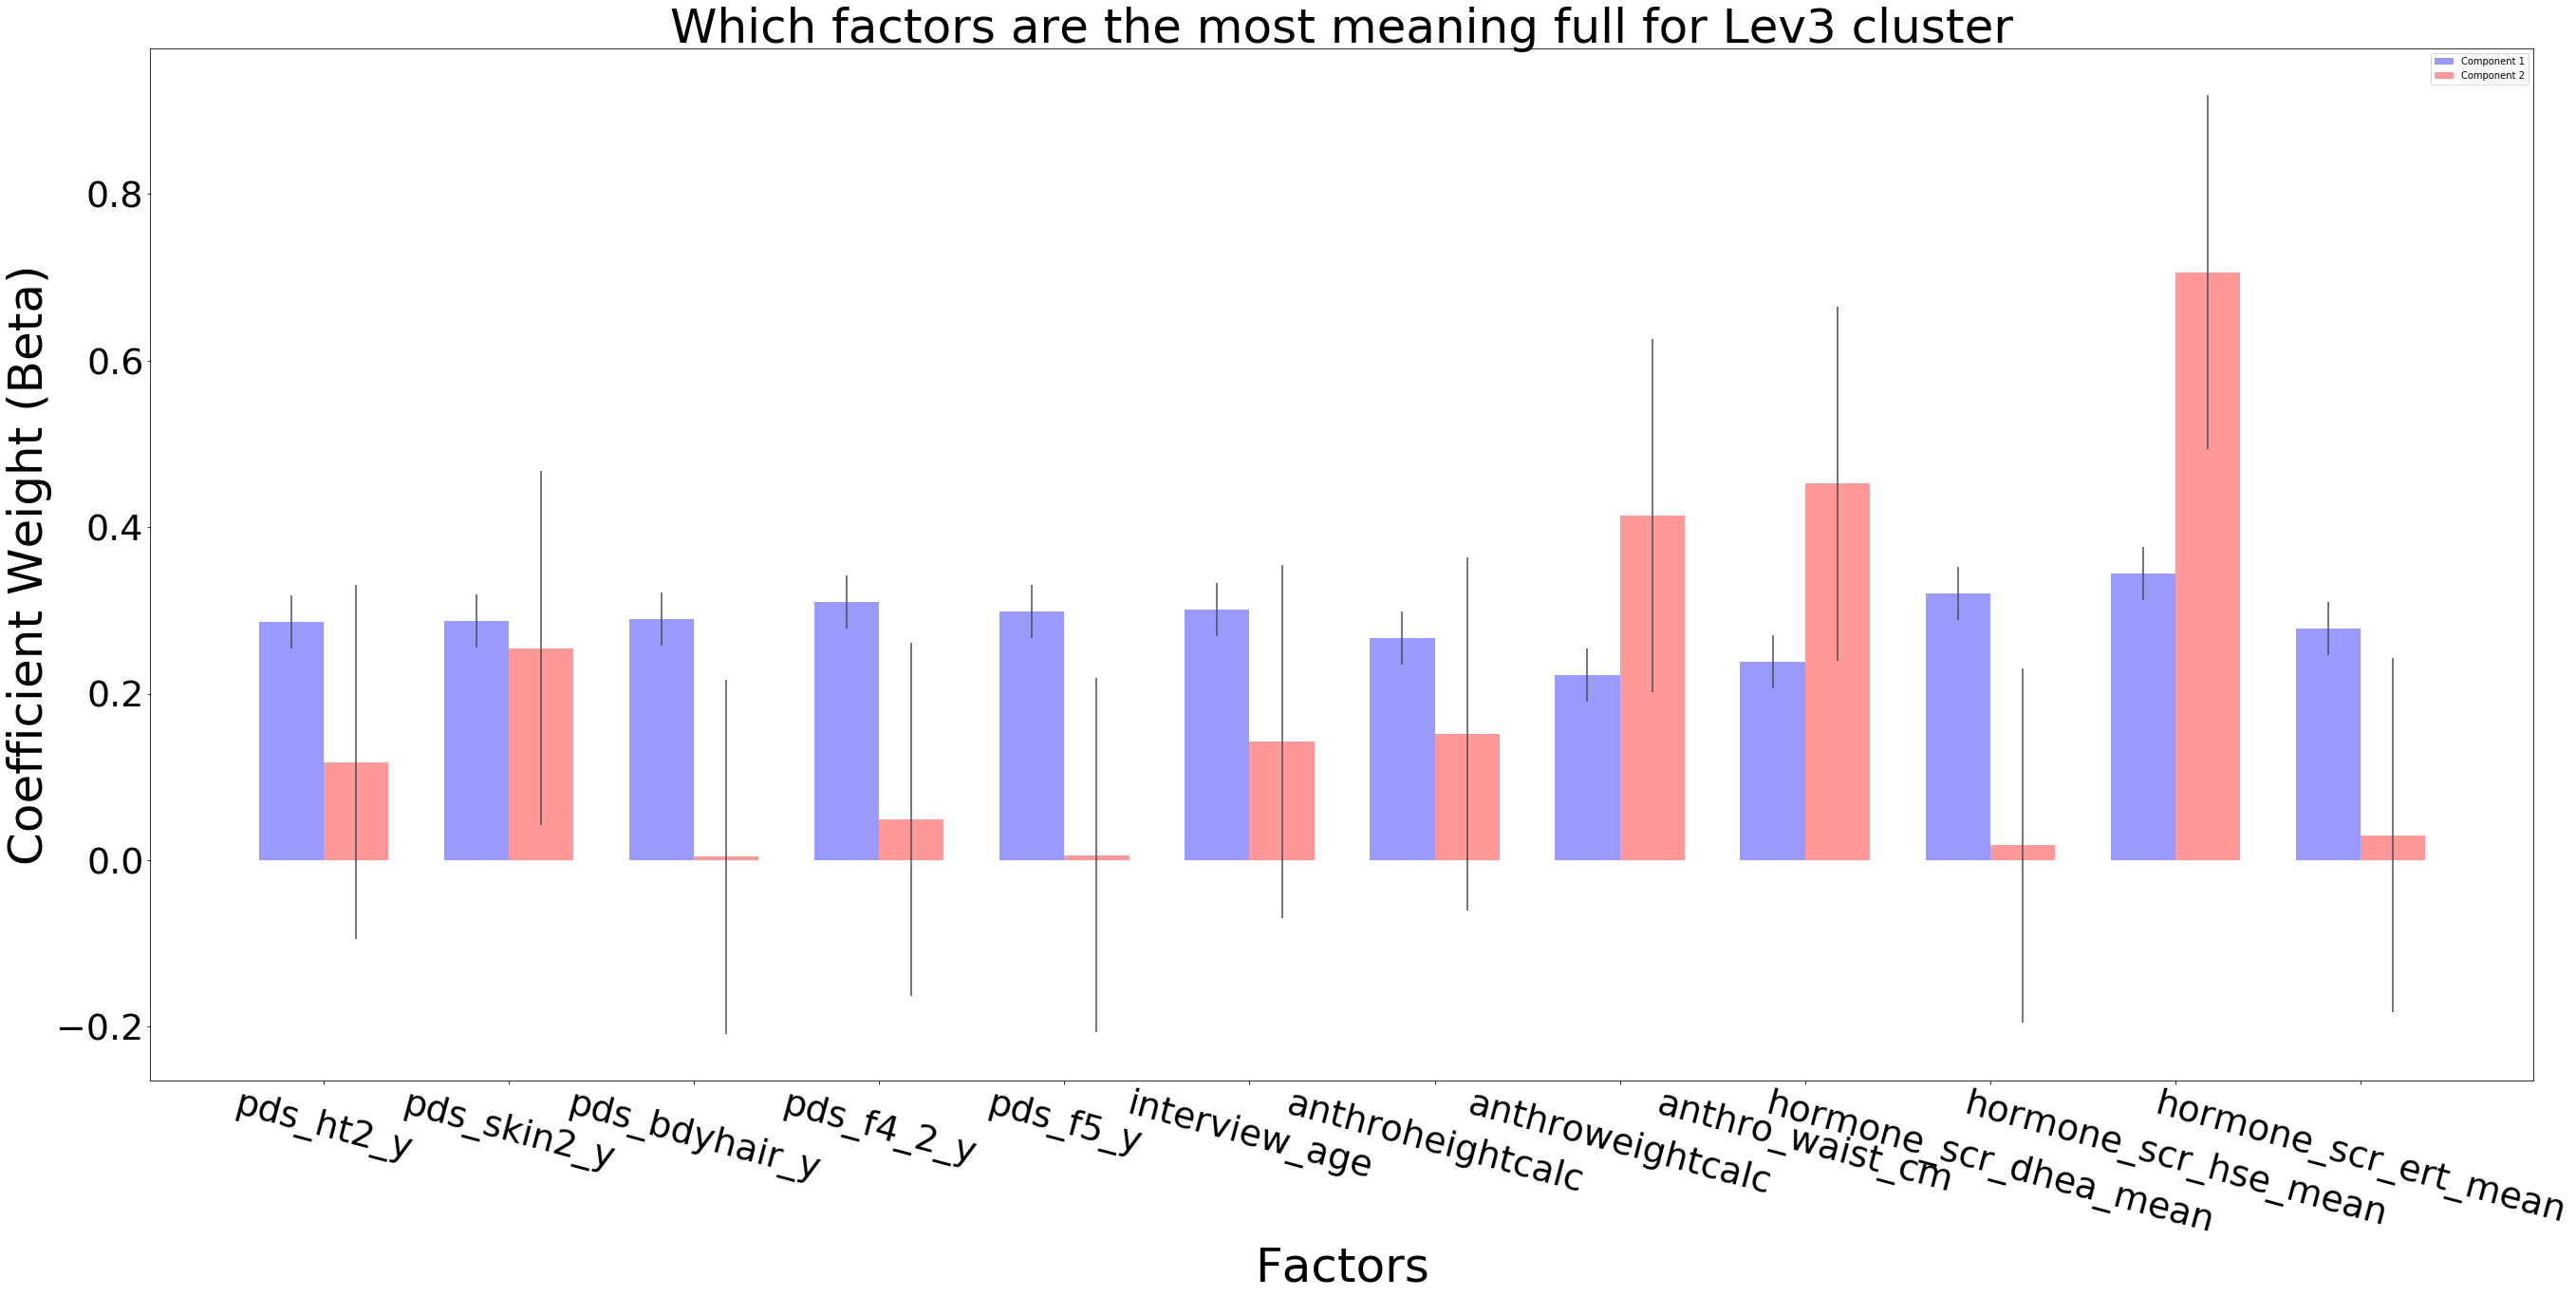

Lev2
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_f4_2_y  pds_f5_y  \
PC-1   0.287516     0.286017       0.280338    0.311775  0.289252   
PC-2   0.047760    -0.178599      -0.099837   -0.048589 -0.078221   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.313146          0.285950          0.231997         0.243271   
PC-2       0.244767          0.310603          0.418419         0.375000   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  hormone_scr_ert_mean  
PC-1               0.307050              0.327746              0.285552  
PC-2              -0.138363             -0.673918              0.044502  




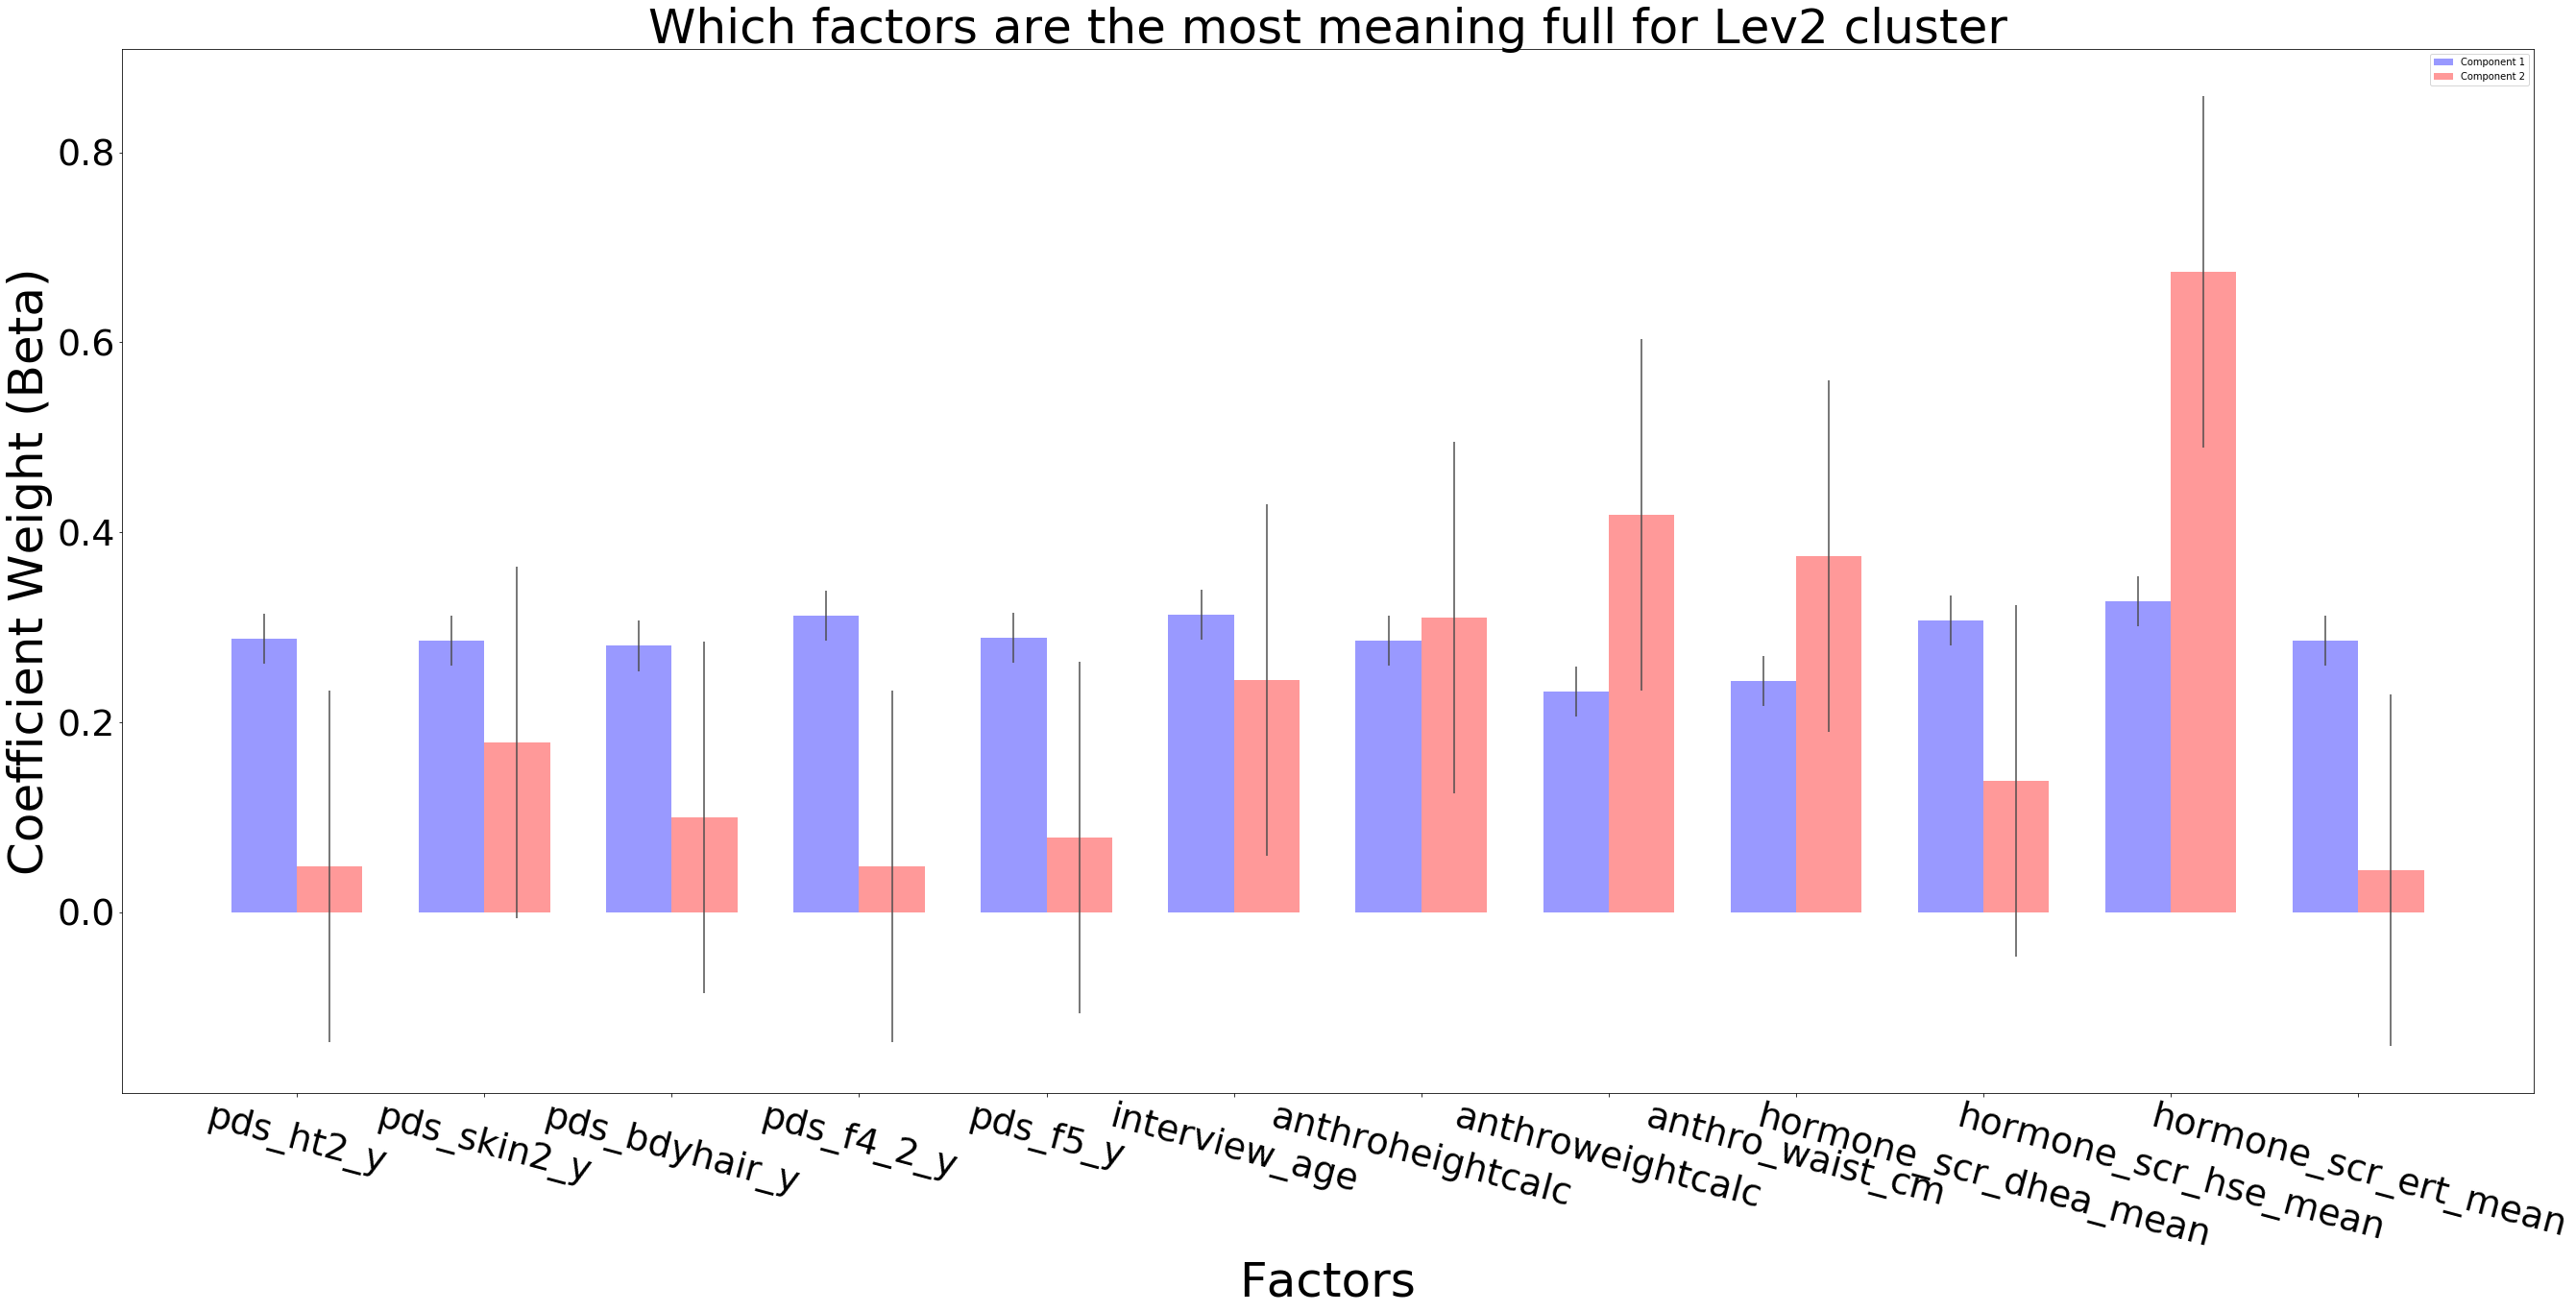

Lev1
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_f4_2_y  pds_f5_y  \
PC-1   0.294019     0.284269       0.279467    0.310085  0.289241   
PC-2   0.007697    -0.176758      -0.086217   -0.060802 -0.086941   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.317623          0.295039          0.240611         0.248420   
PC-2       0.210298          0.294798          0.424621         0.391077   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  hormone_scr_ert_mean  
PC-1               0.297538              0.317611              0.279078  
PC-2              -0.100592             -0.688335              0.041350  




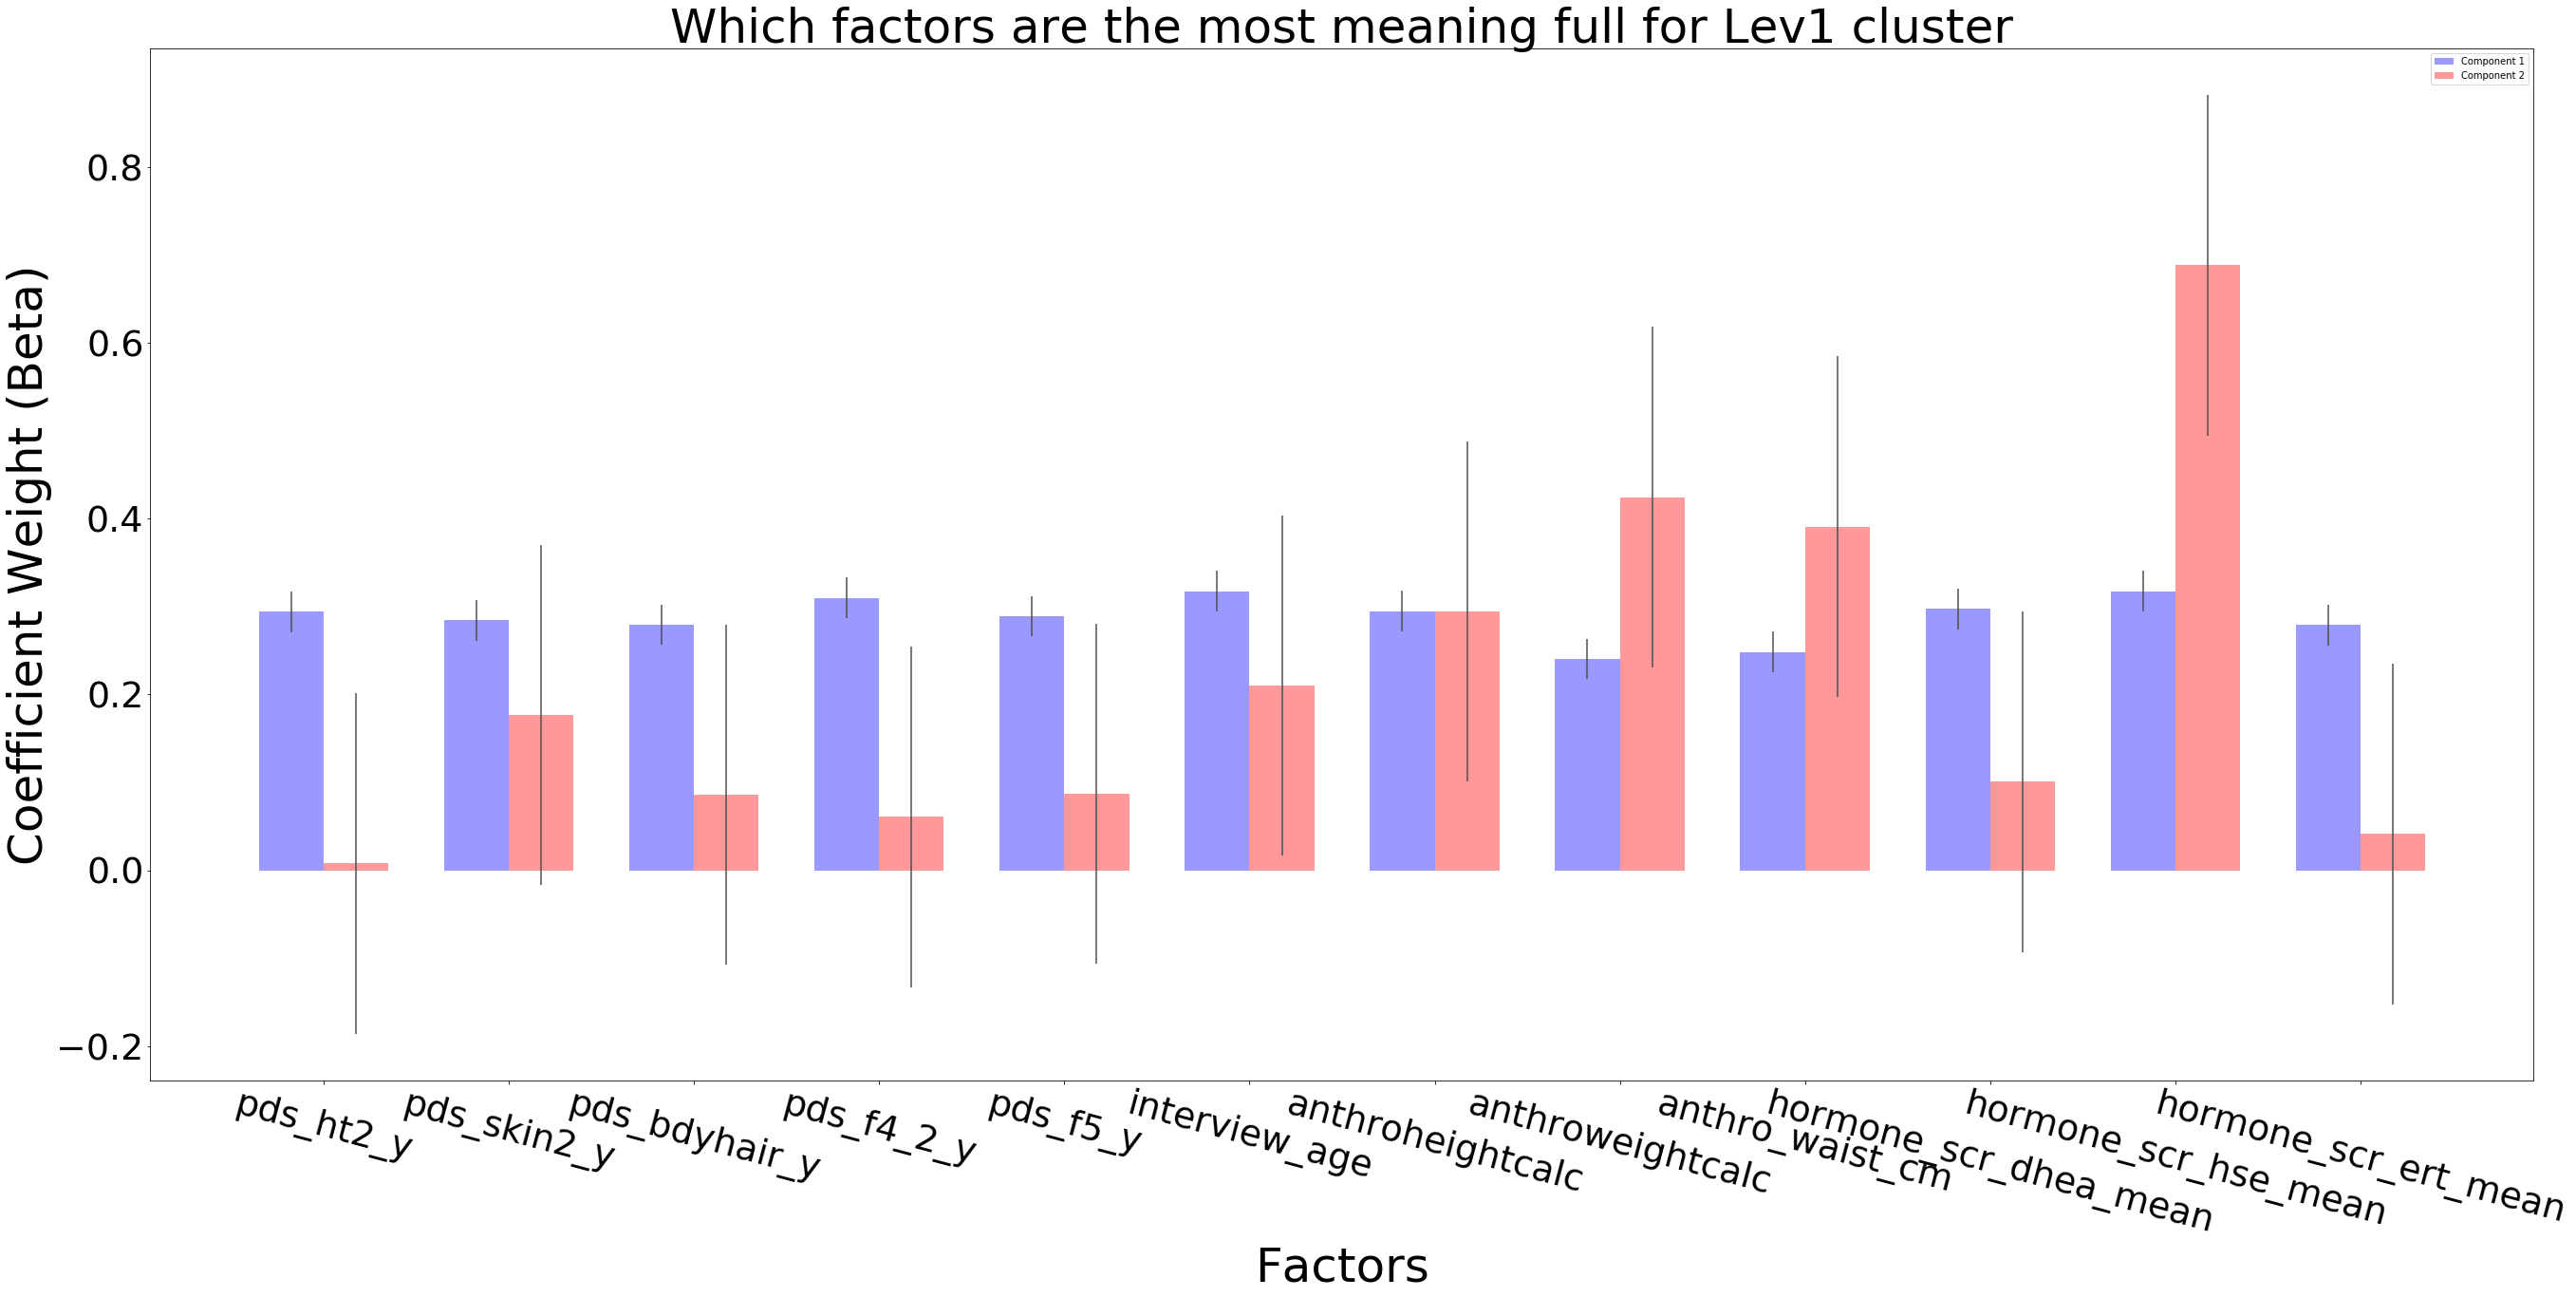

In [24]:
names=['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_f4_2_y',
'pds_f5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']

All_Ratios = {'Lev1': All_lev1Ratio, 'Lev2': All_lev2Ratio, 'Lev3':All_lev3Ratio}
Coefs = {}
index = np.arange(12)
for key, value in All_Ratios.iteritems(): 
    pca = PCA(n_components=2)
    pca.fit_transform(value)
    i = np.identity(value.shape[1])  # identity matrix
    Coefs[key] = pca.transform(i)
    print(key)
    print pd.DataFrame(pca.components_,columns=names,index = ['PC-1','PC-2'])
    print('\n')
    
    n_groups = 12

    means_CP1 = np.absolute(pca.components_[0,:])
    std_CP1 = np.matrix.std(np.matrix(np.absolute(pca.components_[0,:])))

    means_CP2 = np.absolute(pca.components_[1,:])
    std_CP2 = np.matrix.std(np.matrix(np.absolute(pca.components_[1,:])))

    fig, ax = plt.subplots(figsize=(45, 20))
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, means_CP1, bar_width,
                    alpha=opacity, color='b',
                    yerr=std_CP1, error_kw=error_config,
                    label='Component 1')

    rects2 = ax.bar(index + bar_width, means_CP2, bar_width,
                    alpha=opacity, color='r',
                    yerr=std_CP2, error_kw=error_config,
                    label='Component 2')
    #plt.xlabel( fontsize=18)
    ax.set_xlabel('Factors', fontsize = 50)
    ax.set_ylabel('Coefficient Weight (Beta)', fontsize = 50)
    ax.set_title('Which factors are the most meaning full for %s cluster'%key, fontsize = 50)
    ax.set_xticks(index + bar_width / 2)
    
    ax.set_xticklabels(names, fontsize = 28, rotation = -15)
    ax.legend()
    ax.tick_params(labelsize = 38)

    fig=plt.figure(figsize=(100, 16), dpi= 80, facecolor='w', edgecolor='k')
    fig.tight_layout()
    plt.show()
    

## Looking at the data

merging the original and new data sets on the indexes

In [25]:
all_dat['real'].describe()

count     300000
unique         3
top            3
freq      100000
Name: real, dtype: int64

In [26]:
testData = pd.DataFrame(data = lady_dudes)
testData
# print(dudes)
# print(testData) 
total_g=pd.merge(all_dat, testData, on = ['sub'], how = 'outer')

In [27]:
colz=list(total_g.columns.values)
colz[2:]

['predicted',
 'real',
 'pds_ht2_y_x',
 'pds_skin2_y_x',
 'pds_bdyhair_y_x',
 'pds_f4_2_y_x',
 'pds_f5_y_x',
 'interview_age_x',
 'anthroheightcalc_x',
 'anthroweightcalc_x',
 'anthro_waist_cm_x',
 'hormone_scr_dhea_mean_x',
 'hormone_scr_hse_mean_x',
 'hormone_scr_ert_mean_x',
 'pds_ht2_y_y',
 'pds_skin2_y_y',
 'pds_bdyhair_y_y',
 'labels_true',
 'pds_f4_2_y_y',
 'pds_f5_y_y',
 'pds_m4_y',
 'pds_m5_y',
 'interview_age_y',
 'gender',
 'anthroheightcalc_y',
 'anthroweightcalc_y',
 'anthro_waist_cm_y',
 'hormone_scr_dhea_mean_y',
 'hormone_scr_hse_mean_y',
 'hormone_scr_ert_mean_y',
 'sex']

In [28]:
total_g.to_csv('/Users/gracer/Google Drive/ABCD/important_txt/female_puberty_ana.csv', sep=',')

In [29]:
total_g.dtypes
total_g['predicted']=total_g['predicted'].astype(str).astype(float)

In [30]:
print(total_g.dtypes)
total_g.head()

index                       object
sub                         object
predicted                  float64
real                        object
pds_ht2_y_x                 object
pds_skin2_y_x               object
pds_bdyhair_y_x             object
pds_f4_2_y_x                object
pds_f5_y_x                  object
interview_age_x             object
anthroheightcalc_x          object
anthroweightcalc_x          object
anthro_waist_cm_x           object
hormone_scr_dhea_mean_x     object
hormone_scr_hse_mean_x      object
hormone_scr_ert_mean_x      object
pds_ht2_y_y                  int64
pds_skin2_y_y                int64
pds_bdyhair_y_y              int64
labels_true                float64
pds_f4_2_y_y               float64
pds_f5_y_y                 float64
pds_m4_y                   float64
pds_m5_y                   float64
interview_age_y              int64
gender                      object
anthroheightcalc_y         float64
anthroweightcalc_y         float64
anthro_waist_cm_y   

,index,sub,predicted,real,pds_ht2_y_x,pds_skin2_y_x,pds_bdyhair_y_x,pds_f4_2_y_x,pds_f5_y_x,interview_age_x,...,pds_m5_y,interview_age_y,gender,anthroheightcalc_y,anthroweightcalc_y,anthro_waist_cm_y,hormone_scr_dhea_mean_y,hormone_scr_hse_mean_y,hormone_scr_ert_mean_y,sex
0,20,NDAR_INV1ZY11ZP0,1.0,1,-0.494236,-0.916001,-0.845055,0.249625,-0.191892,-0.228608,...,0.0,119,F,54.0,72.25,27.5,1,NaN,NaN,1
1,20,NDAR_INV1ZY11ZP0,1.0,1,-0.494236,-0.916001,-0.845055,0.249625,-0.191892,-0.228608,...,0.0,119,F,54.0,72.25,27.5,1,NaN,NaN,1
2,20,NDAR_INV1ZY11ZP0,0.0,1,-0.494236,-0.916001,-0.845055,0.249625,-0.191892,-0.228608,...,0.0,119,F,54.0,72.25,27.5,1,NaN,NaN,1
3,20,NDAR_INV1ZY11ZP0,0.0,1,-0.494236,-0.916001,-0.845055,0.249625,-0.191892,-0.228608,...,0.0,119,F,54.0,72.25,27.5,1,NaN,NaN,1
4,20,NDAR_INV1ZY11ZP0,1.0,1,-0.494236,-0.916001,-0.845055,0.249625,-0.191892,-0.228608,...,0.0,119,F,54.0,72.25,27.5,1,NaN,NaN,1


In [31]:
# identify the columns we want to aggregate by; this could
# equivalently be defined as list(df.columns[0:3])
group_cols = ['sub']
# identify the columns which we want to average; this could
# equivalently be defined as list(df.columns[4:])
metric_cols = colz[2:]

# create a new DataFrame with a MultiIndex consisting of the group_cols
# and a column for the mean of each column in metric_cols
aggs = total_g.groupby(group_cols)[metric_cols].mean()
# remove the metric_cols from df because we are going to replace them
# with the means in aggs
total_g.drop(metric_cols, axis=1, inplace=True)
# dedupe to leave only one row with each combination of group_cols
# in df
total_g.drop_duplicates(subset=group_cols, keep='last', inplace=True)
# add the mean columns from aggs into df
df = total_g.merge(right=aggs, right_index=True, left_on=group_cols, how='right')

In [32]:
df.head()


,index,sub,predicted,pds_ht2_y_y,pds_skin2_y_y,pds_bdyhair_y_y,labels_true,pds_f4_2_y_y,pds_f5_y_y,pds_m4_y,pds_m5_y,interview_age_y,anthroheightcalc_y,anthroweightcalc_y,anthro_waist_cm_y,hormone_scr_dhea_mean_y,hormone_scr_hse_mean_y,hormone_scr_ert_mean_y,sex
351,20,NDAR_INV1ZY11ZP0,0.727273,2,1,1,1.4,2.0,1.0,0.0,0.0,119,54.00,72.25,27.50,1,NaN,NaN,1
671,102,NDAR_INVA12JUH5Z,0.700000,2,1,1,1.4,2.0,1.0,0.0,0.0,122,54.25,70.00,26.25,1,NaN,NaN,1
1007,38,NDAR_INV3MLPX0CG,0.690476,2,1,1,1.2,1.0,1.0,0.0,0.0,108,51.50,58.00,21.00,101,1.401,36.298,1
1329,22,NDAR_INV24534L6F,0.714286,2,1,1,1.2,1.0,1.0,0.0,0.0,108,55.80,68.60,24.00,590,0.659,10.513,1
1673,126,NDAR_INVCY3FV4T9,0.686047,2,2,1,1.4,1.0,1.0,0.0,0.0,116,52.00,53.00,26.00,1,NaN,NaN,1


In [33]:
varsy =[dudes, trans, FINAL, total_g, df] 

In [34]:
all_vars = {}
keys = ['lady_dudes','trans','FINAL','total_g','df'] 

for i in range(0,len(keys)):
    all_vars[keys[i]] = varsy[i]


In [35]:
import pickle

filename = '/Users/gracer/Google Drive/ABCD/important_txt/female_data.pickle'
with open(filename, 'wb') as handle:
    pickle.dump(all_vars, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

# print all_vars == b

In [36]:
df.to_csv('/Users/gracer/Google Drive/ABCD/important_txt/female_puberty_ana_mean.csv', sep=',')

* All_clust (180,)<- length of the subjects over all runs
* All_clust_space(180,)<-length of the subjects over all runs
* All_means(180,)<-length of the subjects
* All_labels(180,) <- length of subjects True Labels
* All_index(180,)<-length of subjects Index of the original data
* All_comp(18, 12)<- rows are the the PCA components, times the number of the levels, and the number of runs. cols are the factors
* All_var_ratio(108, 2)<-rows are the number of runs, times the number of factors, times the number of levels
* All_var(3, 6)<- rows are the number of runs, the columns are the PCA componenets times the number of levels
* All_mean(9, 12)<- rows are the number of runs by the number of levels the columns are the number of factors
* All_data(180, 14)<-rows are the number of subjects, the columns are number of factors plus the index, plus the components

* components_ : array, shape (n_components, n_features)

* explained_variance_ratio_ : array, shape (n_components,)

*  singular_values_ : array, shape (n_components,)

*  mean_ : array, shape (n_features,)

*  n_components_ : int

*  noise_variance_ : float